<a href="https://colab.research.google.com/github/ayushbisht2001/MACHINE-LEARNING-WITH-TF/blob/main/Diabetes_checker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
from google.colab import files 
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [2]:
import io
diabetes = pd.read_csv(io.BytesIO(uploaded["diabetes.csv"]))

diabetes = diabetes.replace(to_replace="tested_positive",value=1)
diabetes= diabetes.replace(to_replace="tested_negative",value=0)

In [3]:
diabetes.head()


,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.columns

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [5]:
cols_to_norm = ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi']

In [6]:
# Normalization using python , keeping all the values in rnage of [0,1]
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x : (x-x.min())/(x.max() - x.min()))


In [7]:
diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [8]:
num_preg = tf.feature_column.numeric_column('preg')
num_plas = tf.feature_column.numeric_column('plas')
num_pres = tf.feature_column.numeric_column('pres')
num_skin = tf.feature_column.numeric_column('skin')
num_insu = tf.feature_column.numeric_column('insu')
num_mass = tf.feature_column.numeric_column('mass')
num_pedi = tf.feature_column.numeric_column('pedi')
num_age  = tf.feature_column.numeric_column('age')

In [9]:
import matplotlib.pyplot as plt


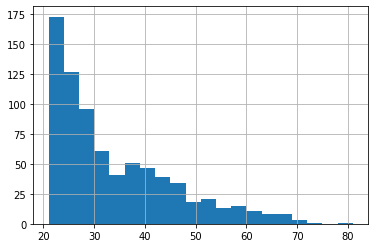

In [10]:
# hist  : to print the histogram
diabetes['age'].hist(bins=20)

In [11]:
age_bucket = tf.feature_column.bucketized_column(num_age,boundaries=[20,30,40,50,60,70,80])

In [12]:
feat_cols = [num_insu,age_bucket,num_mass,num_pedi,num_plas,num_preg,num_pres,num_skin]

In [13]:
# Train and testing split

In [14]:
x_data = diabetes.drop('class',axis=1)
x_data.head()
# x_data.info()


,preg,plas,pres,skin,insu,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33


In [15]:
labels = diabetes['class']
labels.head()


0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [ ]:
#  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
"""
example
x_data = [[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]]
labels = [0,1,0,1,0]
test_size = represent the proportion of the dataset to include in the test split.
random_state = shuffling applied to the data before applying the split.
"""
x_train,x_test,y_train,y_test = train_test_split(x_data,labels,test_size=0.3,random_state=101)
"""
x_train,x_test,y_train,y_test = train_test_split(x_data,labels,test_size=101)

.............same as above ..................

x_train = x_data[ : 101]
x_test = x_data[101:]
y_train = labels[:101]
y_test = labels[101:]

"""

In [18]:
y_train


711    0
58     0
216    1
168    0
658    0
      ..
75     0
599    0
575    0
337    1
523    1
Name: class, Length: 537, dtype: int64

In [19]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_train, y = y_train,batch_size = 10,num_epochs=1000,shuffle=True )
print(input_func)
  


<function pandas_input_fn.<locals>.input_fn at 0x7fab4ee4b1e0>


In [20]:
# Linear Classifier to predict the result

# Train a linear model to classify instances into one of multiple possible classes. When number of possible classes is 2, this is binary classification.
model = tf.compat.v1.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2) # class 1 : diabetic or class 0: non-diabetic

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpejomqwjr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [21]:
model.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpejomqwjr/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 6.931472, step = 0
INFO:tensorflow:global_step/sec: 256.924
INFO:tensorflow:loss = 4.6880426, step = 100 (0.394 sec)
INFO:tensorflow:global_step/sec: 472.182
INFO:tensorflow:loss = 4.9899635, step = 200 (0.215 sec)
INFO:tensorflow:global_step/sec: 416.761
INFO:tensorflow:loss = 4.829569, step = 300 (0.240 sec)
INFO:tensorflow:global_step/sec: 403.248
INFO:tensorflow:loss = 7.2353024, step = 400 (0.247 sec)
INFO:tensorflow:global_step/sec: 380.961
INFO:tensorflow:

In [22]:
# Eval the model
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,batch_size = 10,num_epochs=1,shuffle=False)

In [23]:
result = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Instructions for updating:
The value of AUC returned by this may race with the update so this is deprecated. Please use tf.keras.metrics.AUC instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-20T22:46:39Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpejomqwjr/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.69371s
INFO:tensorflow:Finished evaluation at 2021-01-20-22:46:40
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7316017, accuracy_baseline = 0.64935064, auc = 0.79971194, auc_precision_recall = 0.6491966, average_loss = 0.52625376, global_step = 1000, label/mean = 0.35064936, loss = 5.0651927, precision = 0.63380283, prediction/mean = 0.37195808, recall = 0.5555556
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpejomqwjr/model.ckpt-1000


In [24]:
result

{'accuracy': 0.7316017,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79971194,
 'auc_precision_recall': 0.6491966,
 'average_loss': 0.52625376,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0651927,
 'precision': 0.63380283,
 'prediction/mean': 0.37195808,
 'recall': 0.5555556}

In [25]:
pred_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test,batch_size= 10,num_epochs=1,shuffle = False)


In [26]:
predictions = model.predict(pred_input_func)

In [27]:
predictions


<generator object Estimator.predict at 0x7fab487adc50>

In [28]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpejomqwjr/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [29]:
my_pred

[{'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5152439], dtype=float32),
  'logits': array([0.06099439], dtype=float32),
  'probabilities': array([0.48475614, 0.5152439 ], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6355256], dtype=float32),
  'logits': array([0.55599594], dtype=float32),
  'probabilities': array([0.36447442, 0.6355255 ], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.4019812], dtype=float32),
  'logits': array([-0.39721692], dtype=float32),
  'probabilities': array([0.59801877, 0.40198117], dtype=float32)},


In [55]:
# dense neural network , to predict the result
dnn_model = tf.compat.v1.estimator.DNNClassifier(hidden_units=[10,10,10,10,10],feature_columns=feat_cols,n_classes=2)



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpdmgod3vx', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [51]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpa6_831hj/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1000...
INFO:tensorflow:Saving checkpoints for 1000 into /tmp/tmpa6_831hj/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1000...
INFO:tensorflow:loss = 3.9410958, step = 1000
INFO:tensorflow:global_step/sec: 340.461
INFO:tensorflow:loss = 1.8231211, step = 1100 (0.308 sec)
INFO:tensorflow:global_step/sec: 416.482
INFO:tensorflow:loss = 7.967082, step = 1200 (0.239 sec)
INFO:tensorflow:global_step/sec: 371.714
INFO:tensorflow:loss = 3.1565592, step = 1300 (0.267 sec)
INFO:tensorflow:global_step/sec: 382.806
INFO:tensorflow:loss = 4.0114946, step = 1400 (0.262 sec)
INFO:tensorflo

If we have, categorical data in our feature_column then, before training the model using DNN we have to convert that column into embedding column.

example:
#### <b>`assigned_group =[A,B,C,A,B,C,B....... .A,B]` </b>


#### **`feat_cols = [num_insu,age_bucket,num_mass,num_pedi,num_plas,num_preg,num_pres,num_skin, assigned_group]`**


then , firstly we have to convert categorical data into embedding data as : - 


#### **`embedded_group_col =tf.feature_column.embedding_column(assigned_group,dimensions=3)**` #since only A,B,C group are there that why dim. 3

#### **`feat_cols = [num_insu,age_bucket,num_mass,num_pedi,num_plas,num_preg,num_pres,num_skin,embedded_group_col]`**

then, train the model using DNN

**`input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)`**


**`dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2`**


**`dnn_model.train(input_fn = input_func,steps=1000)`**

In [52]:
# Eval the model

model_eval_DNN = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,batch_size=5,num_epochs=100,shuffle=True)

In [53]:
dnn_model.evaluate(model_eval_DNN)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-20T23:47:54Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpa6_831hj/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 11.72435s
INFO:tensorflow:Finished evaluation at 2021-01-20-23:48:06
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.7619048, accuracy_baseline = 0.64935064, auc = 0.84000003, auc_precision_recall = 0.7232253, average_loss = 0.47162208, global_step = 2000, label/mean = 0.35064936, loss = 2.3581104, precision = 0.6625, prediction/mean = 0.3602226, recall = 0.654321
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: /tmp/tmpa6_831hj/model.ckpt-2000


{'accuracy': 0.7619048,
 'accuracy_baseline': 0.64935064,
 'auc': 0.84000003,
 'auc_precision_recall': 0.7232253,
 'average_loss': 0.47162208,
 'global_step': 2000,
 'label/mean': 0.35064936,
 'loss': 2.3581104,
 'precision': 0.6625,
 'prediction/mean': 0.3602226,
 'recall': 0.654321}

In [68]:
from pandas.plotting import radviz
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

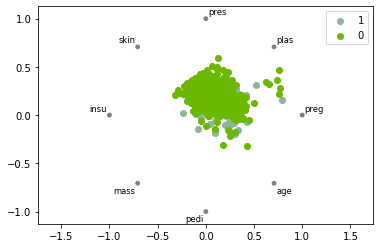

In [73]:
radviz(diabetes, 'class')